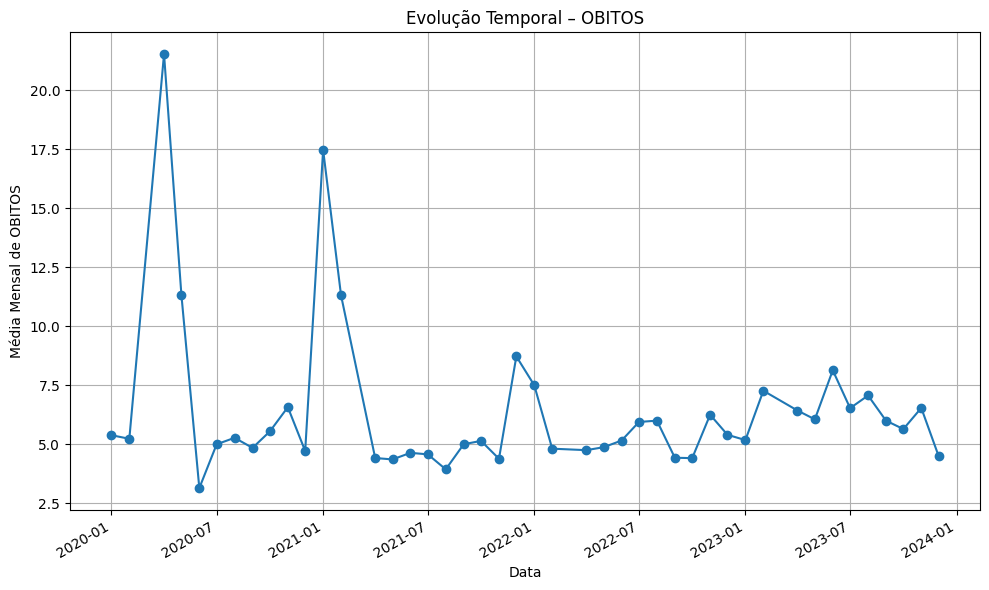

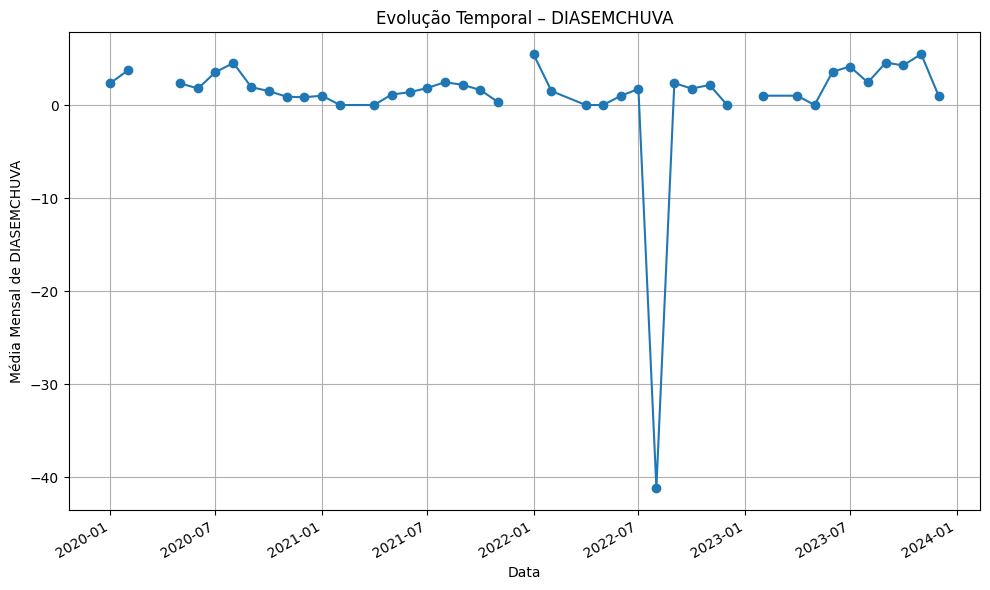

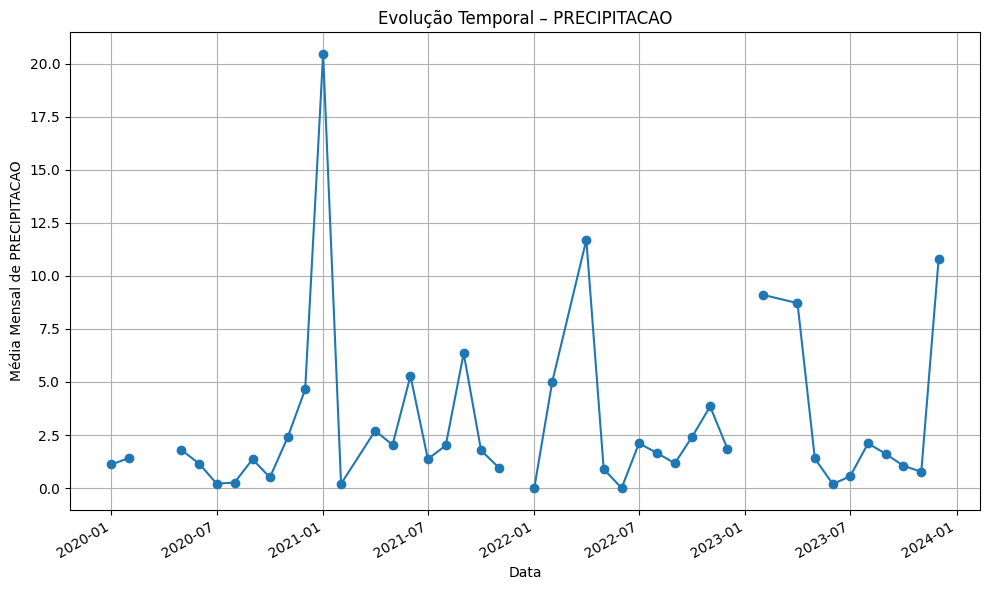

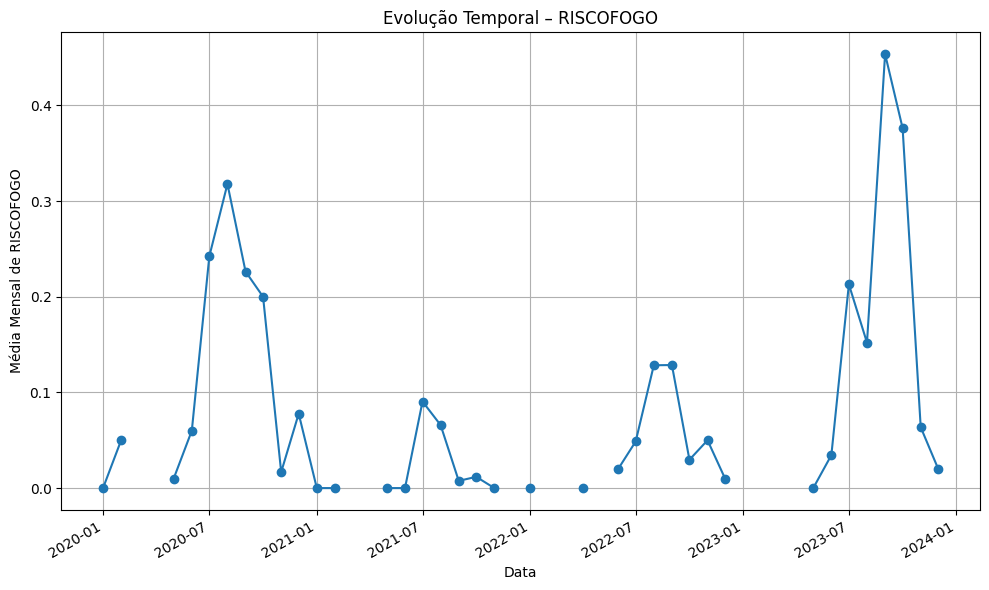

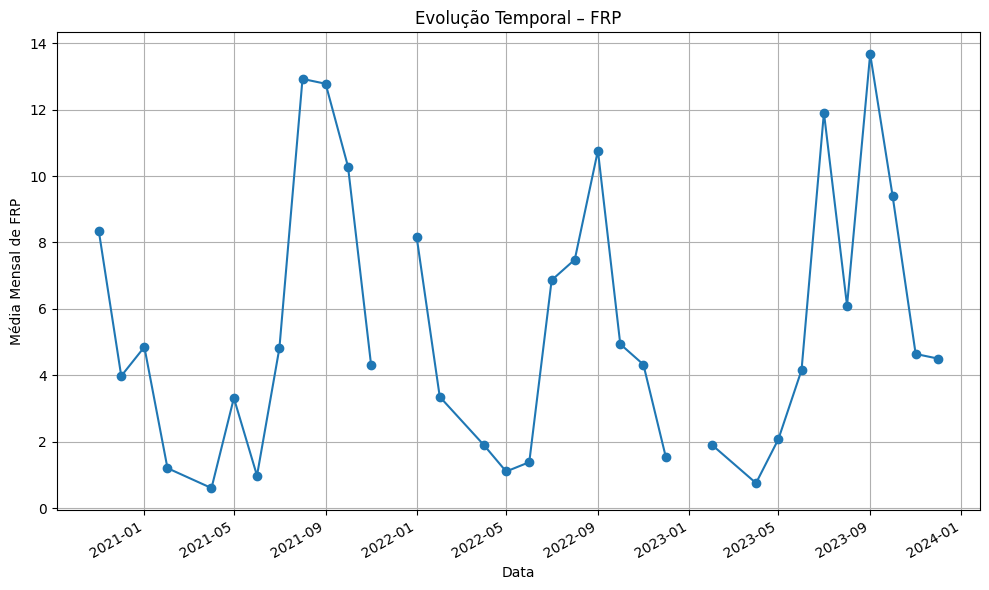

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados com separador correto
df = pd.read_csv('planilha_unificada.csv', sep=';')

# Renomear colunas para facilitar acesso (remover espaços, maiúsculas etc)
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_").str.replace("-", "_")

# Converter colunas de tempo
df['ANO'] = pd.to_numeric(df['ANO'], errors='coerce')
df['MES'] = pd.to_numeric(df['MES'], errors='coerce')

# Criar coluna ano-mês e converter para datetime
df['YEAR_MONTH'] = df['ANO'].astype(int).astype(str) + '-' + df['MES'].astype(int).astype(str).str.zfill(2)
df['DATE'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y-%m')

# Variáveis a plotar (verifica se a coluna existe antes de plotar)
variables = ['OBITOS', 'DIASEMCHUVA', 'PRECIPITACAO', 'RISCOFOGO', 'FRP']

for var in variables:
    if var in df.columns:
        # Converter para numérico se necessário
        df[var] = pd.to_numeric(df[var], errors='coerce')

        # Agrupar por data e calcular média
        df_grouped = df.groupby('DATE')[var].mean()

        # Plotar
        plt.figure(figsize=(10, 6))
        df_grouped.plot(marker='o')
        plt.title(f'Evolução Temporal – {var}')
        plt.xlabel('Data')
        plt.ylabel(f'Média Mensal de {var}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Coluna '{var}' não encontrada na planilha.")
